# Train

In [1]:
from app.core.training.data import CustomDataset
import os
from PIL import Image

In [14]:
root = "app/core/datasets/Persian OCR Dataset - kaggle farboodi"

In [3]:
a = CustomDataset(root)

شانلیاورفه باشه از


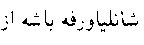

In [13]:
i = 7891
print(a[i][1])
a[i][0]

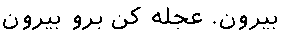

In [12]:
Image.open(os.path.join(a.images_path, a.images[1])).convert("RGB")

# Dev

In [3]:
from transformers import (
    VisionEncoderDecoderModel,
    ViTModel,
    BertLMHeadModel,
    AutoTokenizer,
    TrOCRProcessor,
    ViTImageProcessor,
    EncoderDecoderModel,
    BertConfig
)
import torch
from PIL import Image
from torchinfo import summary
import numpy as np

In [7]:
processor = TrOCRProcessor.from_pretrained(
    pretrained_model_name_or_path="app/core/models/trocr-base-printed",
    tokenizer = AutoTokenizer.from_pretrained("app/core/models/bert-fa-base-uncased"),
    use_fast=True,
    device="cuda",
)
# tokenizer = AutoTokenizer.from_pretrained("app/core/models/bert-fa-base-uncased")
encoder = ViTModel.from_pretrained("app/core/models/trocr-base-printed")
decoder = BertLMHeadModel.from_pretrained(
    "app/core/models/bert-fa-base-uncased",
    is_decoder=True,
    add_cross_attention = True,
)
model = VisionEncoderDecoderModel(encoder=encoder, decoder=decoder).to("cuda")
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.generation_config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.bos_token_id = processor.tokenizer.cls_token_id
model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id

Some weights of ViTModel were not initialized from the model checkpoint at app/core/models/trocr-base-printed and are newly initialized: ['embeddings.cls_token', 'embeddings.patch_embeddings.projection.bias', 'embeddings.patch_embeddings.projection.weight', 'embeddings.position_embeddings', 'encoder.layer.0.attention.attention.key.weight', 'encoder.layer.0.attention.attention.query.weight', 'encoder.layer.0.attention.attention.value.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.layernorm_after.bias', 'encoder.layer.0.layernorm_after.weight', 'encoder.layer.0.layernorm_before.bias', 'encoder.layer.0.layernorm_before.weight', 'encoder.layer.0.output.dense.bias', 'encoder.layer.0.output.dense.weight', 'encoder.layer.1.attention.attention.key.weight', 'encoder.layer.1.attention.attention.query.weight', 'encoder.layer.1.attention

In [6]:
width, height = 384, 384
dummy_image = Image.fromarray(np.uint8(np.random.rand(height, width, 3) * 255))

In [8]:
pixel_values = processor(images=[dummy_image, dummy_image], return_tensors="pt", device="cuda").pixel_values
pixel_values.shape

torch.Size([2, 3, 384, 384])

In [239]:
generated_ids = model.generate(pixel_values.to("cuda"))
processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

'و و و و و و و و و و و و و و و و و و و و'

In [ ]:
text = ["احمد محسن", "سلام علیکم و رحمه الله"]
labels = processor.tokenizer(text, return_tensors="pt", padding=True).input_ids.to("cuda")

In [241]:
processor.batch_decode(labels, skip_special_tokens=False)

['[CLS] احمد محسن [SEP] [PAD] [PAD] [PAD]',
 '[CLS] سلام علیکم و رحمه الله [SEP]']

In [249]:
labels.shape

torch.Size([2, 7])

In [243]:
a = model(pixel_values=pixel_values.to("cuda"), labels=labels)

In [245]:
a.loss

tensor(14.3094, device='cuda:0', grad_fn=<NllLossBackward0>)

In [250]:
generated_ids

tensor([[   2, 1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379,
         1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379],
        [   2, 1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379,
         1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379, 1379]],
       device='cuda:0')

In [251]:
processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

'و و و و و و و و و و و و و و و و و و و و'

In [14]:
processor.tokenizer

RobertaTokenizerFast(name_or_path='app/core/models/trocr-base-printed', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True, special=True),
}
)